# Project 1: Numerical Integration
This project looks at different methods by which a function can be integrated.

## Objective:
Numerically integrate the following function:

$$ \int^{5}_{0}\left[\left(\frac{1}{2}x^{3}-4x\right)(\cos(x)+1)\right]$$

1. Design an integration method with a resolution that increases ($N=1,2,4,8,16,32,64,128,512, 1024$):
    1. Midpoint method
    1. Trapezoidal method
    1. Simpson method

1. Use <code>scipy.integrate</code> to find the value of the integral.

1. Determine the indefinite integral of the the above function with the <code>sympy</code> module.
    1. Evaluate the function at the bounds to determine the solution.
    
1. Compare the precision of all results as a function of resolution for the custom methods.

## Solutions:

We begin by defining the integrand and importing the relevent packages.

In [36]:
import numpy as np
import scipy.integrate as si
import sympy as sym
import matplotlib.pyplot as plt

In [37]:
def integrand(x):
    return (1/2*x**3-4*x)*(np.cos(x)+1)

We seek to quantify the area beneath the curve as shown below

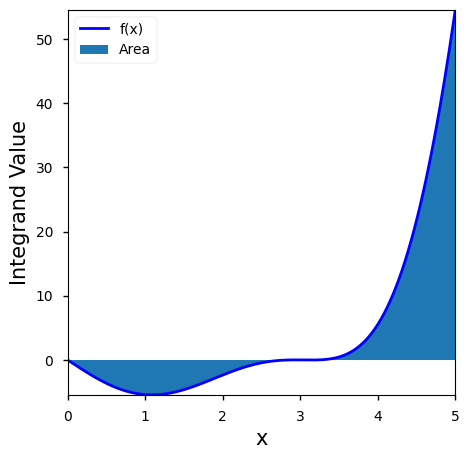

In [38]:
with plt.style.context("seaborn-notebook"):
    x = np.linspace(0,5,256)
    f = integrand(x)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
    ax.plot(x,f,color="b", linewidth = 2, label="f(x)")
    ax.fill_between(x, f, 0, label="Area")

    ax.set_xlabel("x", fontsize=15)
    ax.set_ylabel("Integrand Value", fontsize=15)

    ax.set_xlim([0,5])
    ax.set_ylim([np.min(f), np.max(f)])
    
    ax.legend(loc="best")
plt.show()
    

1. Midpoint rule: Assuming that the integrand is a smooth and continuous function $f(x)$ on the interval $[a,b]$. Let $n$ be a positive integer and $\Delta x=\frac{b-a}{n}$. If $[a,b]$ is divided into $n$ segments of length $\Delta x$ and $m_{i}$ is the midpoint of the $i^{\text{th}}$ subsegment, we find the approximation of the integral becomes

$$M_{n}=\sum_{i=1}^{n}f(m_{i})\Delta x$$

In [39]:
def midpoint(A,B,N):
    x = np.linspace(A+(B-A)/(2*N), B - (B-A)/(2*N), N)
    return np.sum(integrand(x))*(B-A)/N

In [40]:
midpoint(0,5,256)

17.404820658592943

2. Trapezoidal rule: Assuming that the integrand is a smooth and continuous function $f(x)$ on the interval $[a,b]$. Let $n$ be a positive integer and $\Delta x=\frac{b-a}{n}$. If we subdivide the function on the interval into $N$ segments, the sum of those segments approximates the integral, or

$$T_{n} = \frac{1}{2}\sum^{n}_{i=1} \left[f(x_{i-1})+f(x_{i})\right]\Delta x$$

In [41]:
def trapezoidal(A,B,N):
    x = np.linspace(A,B,N+1)
    return np.sum(1/2*integrand(x[0:-1])+1/2*integrand(x[1:]))*(B-A)/N

In [42]:
trapezoidal(0,5,256)

17.409195986887745

3. Simpson's rule: Assuming that the integrand is a smooth and continuous function $f(x)$ on the interval $[a,b]$. Let $n$ be a positive integer and $\Delta x=\frac{b-a}{n}$ and $x_{i}=a+i\Delta x$. The function can be evaluated as the approximation of a polynomial. Skipping the derivation we find that the approximation becomes

$$S_{n} = \frac{h}{3}\sum^{n/2}_{i=1}\left(f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$$

In [43]:
def simpson(A, B, N):
    x = np.linspace(A, B, N)
    y = integrand(x)
    return ((1/3)*(y[0]+y[-1])+(4/3)*np.sum(y[1:N-1:2])+(2/3)*np.sum(y[2:N-2:2]))*(B-A)/N

In [44]:
simpson(0,5,256)

16.29929678524047

2. The <code>scipy</code> package hosts many optimized quadrature methods. We can call the adaptive integration method to determine the value of the integrand

In [45]:
I_scipy, _ = si.quad(integrand, 0, 5)
print(I_scipy)

17.406279103392098


3. The <code>sympy</code> module allows for symbolic representations of operations similar to the functionality found in popular languages like MATLAB or Mathematica. We can determine the indefinite integral and evaluate it at the end points to get the value by first defining the independent variable $x$ and the function given that variable

In [46]:
X = sym.Symbol('x', real = True)
f = (sym.Rational(1/2)*X**3-4*X)*(sym.cos(X)+1)

Ind = sym.integrate(f, X)
Ind

x**4/8 + x**3*sin(x)/2 + 3*x**2*cos(x)/2 - 2*x**2 - 7*x*sin(x) - 7*cos(x)

In [47]:
I_sympy = (Ind.subs(X,5)-Ind.subs(X,0)).evalf()
I_sympy

17.4062791033921

4. Comparing the custom methods with the optimized methods yields results that are close quantitatively. In particular, the <code>scipy</code> and <code>sympy</code> results are matching to the 12<sup>th</sup> decimal place, so we can call this the "actual" result. We evaluate the cutom methods with increasing resolution and view the convergence

In [48]:
n = np.linspace(0,10,11).astype(int)
N = 2**n

M = np.zeros(len(N))
T = np.zeros(len(N))
S = np.zeros(len(N))

for idx, i in enumerate(N):
    M[idx] = midpoint(0,5,i)
    T[idx] = trapezoidal(0,5,i)
    S[idx] = simpson(0,5,i)

In [49]:
with plt.style.context("seaborn-notebook"):

    params = {
        "marker":"o",
        "markersize":5,
        "linestyle":"--",
        "linewidth":1,
        }

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
    ax.plot(N, M, **params, color='k', label = "Midpoint")
    ax.plot(N, T, **params, color='m', label = "Trapezoidal")
    ax.plot(N, S, **params, color='g', label = "Simpson")
    ax.axhline(y=I_scipy, color = 'r', linewidth = 0.5, label = "Scipy")
    ax.axhline(y=I_sympy, color = 'b', linewidth = 0.5, label = "Sympy")
    ax.set_xscale("log", base=2)
    ax.set_xlabel("Iterations", fontsize=15)
    ax.set_ylabel("Calculated Value", fontsize=15)
    ax.legend(loc="best")

Interestingly, Simpson's rule has the slowest convergence. This is because it does not behave well for sinusoidal functions and will diverge in many cases.